#Step 4 
Optimization with uncertain conversion rates, 𝛼 ratios, and number of items sold per product

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4

%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 50
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [==============================] 99.6%
 [0, 2, 0, 2, 0] 485.3619964 9.707239928 dict_values([376.33326362500003, 346.519193485, 332.20454771000004, 306.04211603500005, 377.7464468125, 348.2193132175, 334.041690705, 308.1451824925, 383.3385445, 353.9143347400001, 339.78495164, 314.00113294, 382.4166340625, 353.14940738750005, 339.09529332500006, 313.4511937625, 367.11179937500003, 337.4610512750001, 323.2248856500001, 297.204551525, 368.43560593750004, 339.06405651250003, 324.961458075, 299.19533413749997, 373.6585850000001, 344.3976746, 330.3473796, 304.6938806, 372.80012968750003, 343.68847206249995, 329.709787375, 304.18822018750006, 362.8072795625, 333.18513164250004, 318.960880455, 293.0001738175, 364.04444665625005, 334.69653680875007, 320.6036821525, 294.88882214625, 368.98078325000006, 339.74972022000003, 325.7124277200001, 300.1103549200001, 368.16011578125006, 339.07292919375004, 325.10471366250005, 299.62894288125005, 339.10246324999997, 310.20639411, 296.34279666000

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 3

In [4]:
#unknown parameters
alphas = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #uniform
prods_dist = np.ones((n_products,n_arms))   #all 1


customer = Customer(0,0, alpha = alphas, num_prods_distribution= prods_dist, click_graph = environment.get_aggregate_click_graph())

UCB

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb4_learner = UCBLearner4(n_arms, n_products, customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb4_learner.select_superarm()
        report = environment.round(super_arm)
        ucb4_learner.update(super_arm.copy(), report)
    rewards = ucb4_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%customer alpha: [0.2 0.2 0.2 0.2 0.2]


/Users/sofia/Desktop/UNI/Quarto Anno/Secondo semestre/OLA/OLA_project/Code/MC_simulator.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  ans[primary] = 1 / c.num_prods_distributions[primary][super_arm[primary]]


customer alpha: [0.56 0.02 0.04 0.16 0.22]
customer alpha: [0.48 0.08 0.12 0.13 0.19]
customer alpha: [0.46666667 0.1        0.1        0.12       0.21333333]
customer alpha: [0.455 0.12  0.1   0.125 0.2  ]
customer alpha: [0.468 0.128 0.108 0.112 0.184]
customer alpha: [0.45666667 0.13666667 0.12       0.1        0.18666667]
customer alpha: [0.42857143 0.13142857 0.12571429 0.10571429 0.20857143]
customer alpha: [0.42   0.14   0.1275 0.0975 0.215 ]
customer alpha: [0.42222222 0.14444444 0.12222222 0.09333333 0.21777778]
loading: [=                             ] 3.3%customer alpha: [0.422 0.144 0.126 0.096 0.212]
customer alpha: [0.42181818 0.14181818 0.12363636 0.10181818 0.21090909]
customer alpha: [0.42333333 0.15166667 0.12166667 0.09666667 0.20666667]
customer alpha: [0.41692308 0.15384615 0.12769231 0.09384615 0.20769231]
customer alpha: [0.41857143 0.15142857 0.12714286 0.09285714 0.21      ]
customer alpha: [0.43066667 0.14933333 0.12266667 0.09466667 0.20266667]
customer alpha

customer alpha: [0.3963964  0.17387387 0.13963964 0.09657658 0.19351351]
customer alpha: [0.39696429 0.17321429 0.13946429 0.09714286 0.19321429]
customer alpha: [0.39699115 0.17362832 0.13929204 0.09716814 0.19292035]
customer alpha: [0.39578947 0.1745614  0.14017544 0.09649123 0.19298246]
customer alpha: [0.39530435 0.17478261 0.14034783 0.09634783 0.19321739]
customer alpha: [0.39586207 0.175      0.13982759 0.09706897 0.19224138]
customer alpha: [0.39589744 0.17521368 0.13948718 0.09709402 0.19230769]
customer alpha: [0.39661017 0.17525424 0.13898305 0.09661017 0.19254237]
customer alpha: [0.39714286 0.17546218 0.13915966 0.09630252 0.19193277]
loading: [============                  ] 40.0%customer alpha: [0.39633333 0.17566667 0.13916667 0.09666667 0.19216667]
customer alpha: [0.39636364 0.17636364 0.13966942 0.09603306 0.19157025]
customer alpha: [0.39655738 0.17672131 0.13901639 0.0957377  0.19196721]
customer alpha: [0.39626016 0.17626016 0.1396748  0.09577236 0.19203252]
cust

customer alpha: [0.39394495 0.17844037 0.13642202 0.09917431 0.19201835]
customer alpha: [0.39378995 0.17835616 0.13634703 0.09908676 0.19242009]
loading: [======================        ] 73.3%customer alpha: [0.39445455 0.17827273 0.136      0.09909091 0.19218182]
customer alpha: [0.39438914 0.17800905 0.1361086  0.09927602 0.19221719]
customer alpha: [0.39459459 0.17801802 0.13594595 0.09918919 0.19225225]
customer alpha: [0.39399103 0.17856502 0.13578475 0.0993722  0.192287  ]
customer alpha: [0.39491071 0.17848214 0.13553571 0.09928571 0.19178571]
customer alpha: [0.39466667 0.17875556 0.13573333 0.09911111 0.19173333]
customer alpha: [0.39415929 0.17911504 0.13584071 0.09902655 0.19185841]
customer alpha: [0.3939207  0.17947137 0.13559471 0.09903084 0.19198238]
customer alpha: [0.39377193 0.17964912 0.13561404 0.09903509 0.19192982]
customer alpha: [0.39344978 0.17973799 0.13572052 0.09895197 0.19213974]
loading: [=======================       ] 76.7%customer alpha: [0.39356522 0.

customer alpha: [0.38444444 0.16518519 0.14       0.10962963 0.20074074]
customer alpha: [0.38714286 0.16642857 0.14142857 0.10857143 0.19642857]
customer alpha: [0.38551724 0.16827586 0.14206897 0.10896552 0.19517241]
loading: [===                           ] 10.0%customer alpha: [0.38866667 0.166      0.14       0.10933333 0.196     ]
customer alpha: [0.38709677 0.16645161 0.14       0.11032258 0.19612903]
customer alpha: [0.3825   0.16875  0.13875  0.109375 0.200625]
customer alpha: [0.38424242 0.16848485 0.13939394 0.10969697 0.19818182]
customer alpha: [0.38352941 0.16941176 0.14058824 0.11058824 0.19588235]
customer alpha: [0.38457143 0.16971429 0.14057143 0.10914286 0.196     ]
customer alpha: [0.385      0.17055556 0.14055556 0.10777778 0.19611111]
customer alpha: [0.38378378 0.17135135 0.13945946 0.11027027 0.19513514]
customer alpha: [0.38210526 0.17157895 0.13789474 0.11       0.19842105]
customer alpha: [0.38358974 0.17179487 0.13589744 0.10974359 0.19897436]
loading: [====

customer alpha: [0.39029851 0.17522388 0.14119403 0.10268657 0.19059701]
customer alpha: [0.39155556 0.17496296 0.14088889 0.10222222 0.19037037]
customer alpha: [0.39205882 0.17397059 0.14147059 0.10235294 0.19014706]
customer alpha: [0.39182482 0.17386861 0.14131387 0.10248175 0.19051095]
customer alpha: [0.3915942  0.17449275 0.1415942  0.10231884 0.19      ]
customer alpha: [0.39223022 0.17395683 0.14158273 0.10215827 0.19007194]
loading: [==============                ] 46.7%customer alpha: [0.39228571 0.17357143 0.14171429 0.102      0.19042857]
customer alpha: [0.39276596 0.17361702 0.14170213 0.10184397 0.19007092]
customer alpha: [0.39323944 0.17352113 0.14140845 0.10169014 0.19014085]
customer alpha: [0.39328671 0.17314685 0.14167832 0.10167832 0.19020979]
customer alpha: [0.39236111 0.17402778 0.14138889 0.10166667 0.19055556]
customer alpha: [0.39255172 0.1742069  0.14151724 0.10165517 0.19006897]
customer alpha: [0.39205479 0.17424658 0.14178082 0.10136986 0.19054795]
cust

loading: [========================      ] 80.0%customer alpha: [0.39525    0.17575    0.13866667 0.0995     0.19083333]
customer alpha: [0.39518672 0.17585062 0.13858921 0.09975104 0.19062241]
customer alpha: [0.39553719 0.17578512 0.1385124  0.09958678 0.19057851]
customer alpha: [0.39530864 0.1763786  0.13860082 0.09942387 0.19028807]
customer alpha: [0.39557377 0.17631148 0.13885246 0.0992623  0.19      ]
customer alpha: [0.39542857 0.1762449  0.13844898 0.09918367 0.19069388]
customer alpha: [0.39560976 0.17626016 0.13853659 0.09918699 0.1904065 ]
customer alpha: [0.39587045 0.17651822 0.13854251 0.09902834 0.19004049]
customer alpha: [0.3958871  0.17629032 0.13830645 0.09919355 0.19032258]
customer alpha: [0.39542169 0.17670683 0.1384739  0.09919679 0.1902008 ]
loading: [==========================    ] 83.3%customer alpha: [0.39496 0.17712 0.13872 0.09912 0.19008]
customer alpha: [0.39498008 0.17705179 0.13864542 0.09912351 0.1901992 ]
customer alpha: [0.39492063 0.17753968 0.1384

customer alpha: [0.36612245 0.18       0.14816327 0.1        0.20571429]
loading: [=====                         ] 16.7%customer alpha: [0.3656 0.1804 0.1496 0.0996 0.2048]
customer alpha: [0.36666667 0.18078431 0.14823529 0.10039216 0.20392157]
customer alpha: [0.37       0.17961538 0.14653846 0.09961538 0.20423077]
customer alpha: [0.36792453 0.18037736 0.14754717 0.09924528 0.20490566]
customer alpha: [0.36777778 0.18       0.14777778 0.10037037 0.20407407]
customer alpha: [0.36545455 0.18036364 0.14763636 0.10145455 0.20509091]
customer alpha: [0.36428571 0.18178571 0.14821429 0.10142857 0.20428571]
customer alpha: [0.36385965 0.18140351 0.14842105 0.10245614 0.20385965]
customer alpha: [0.36448276 0.18172414 0.14931034 0.10103448 0.20344828]
customer alpha: [0.36474576 0.18305085 0.14813559 0.10101695 0.20305085]
loading: [======                        ] 20.0%customer alpha: [0.36533333 0.18366667 0.14766667 0.10166667 0.20166667]
customer alpha: [0.36393443 0.18360656 0.14786885 

customer alpha: [0.38653846 0.17794872 0.14089744 0.09897436 0.19564103]
customer alpha: [0.38598726 0.17847134 0.14101911 0.09872611 0.19579618]
customer alpha: [0.3856962  0.17797468 0.14151899 0.09873418 0.19607595]
customer alpha: [0.38566038 0.17823899 0.14100629 0.09861635 0.19647799]
loading: [================              ] 53.3%customer alpha: [0.38525  0.17875  0.141125 0.0985   0.196375]
customer alpha: [0.3847205  0.17937888 0.14173913 0.09826087 0.19590062]
customer alpha: [0.3845679  0.17938272 0.1417284  0.0982716  0.19604938]
customer alpha: [0.38441718 0.1801227  0.14134969 0.09791411 0.19619632]
customer alpha: [0.38341463 0.18012195 0.14207317 0.09792683 0.19646341]
customer alpha: [0.38315152 0.17939394 0.14242424 0.09806061 0.1969697 ]
customer alpha: [0.38325301 0.17903614 0.14253012 0.09771084 0.19746988]
customer alpha: [0.38311377 0.17892216 0.14275449 0.09736527 0.19784431]
customer alpha: [0.38357143 0.17845238 0.14285714 0.09702381 0.19809524]
customer alpha

customer alpha: [0.38801527 0.17793893 0.14183206 0.09977099 0.19244275]
customer alpha: [0.38775665 0.17794677 0.14205323 0.09984791 0.19239544]
customer alpha: [0.38742424 0.17810606 0.14242424 0.09992424 0.19212121]
customer alpha: [0.3874717  0.17781132 0.14233962 0.10007547 0.19230189]
customer alpha: [0.38691729 0.17842105 0.14240602 0.09992481 0.19233083]
customer alpha: [0.38719101 0.17842697 0.14217228 0.09985019 0.19235955]
customer alpha: [0.38738806 0.17828358 0.14201493 0.09985075 0.19246269]
customer alpha: [0.38713755 0.17843866 0.14185874 0.09992565 0.19263941]
loading: [===========================   ] 90.0%customer alpha: [0.38688889 0.17844444 0.142      0.09992593 0.19274074]
customer alpha: [0.38715867 0.17830258 0.14184502 0.0998524  0.19284133]
customer alpha: [0.38720588 0.17838235 0.14161765 0.10014706 0.19264706]
customer alpha: [0.38695971 0.17846154 0.14161172 0.10029304 0.19267399]
customer alpha: [0.38678832 0.17846715 0.14153285 0.10021898 0.1929927 ]
cust

(3, 300)

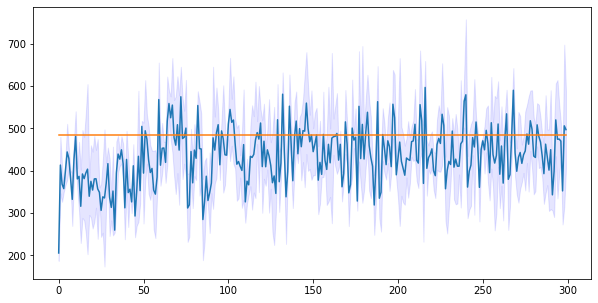

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

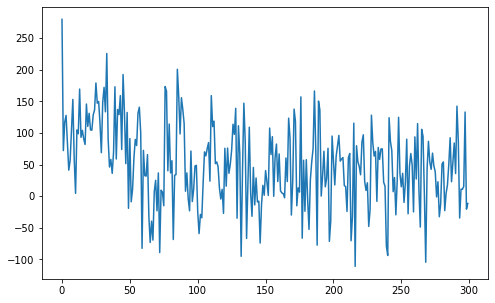

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

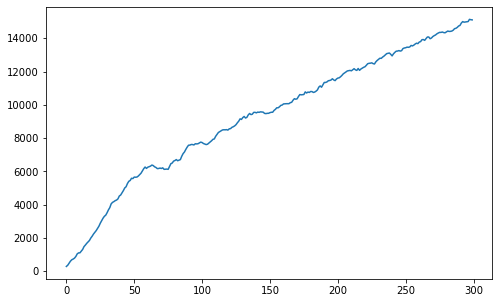

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

TS

In [9]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner4 = TSLearner4(n_arms, n_products, customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner4.select_superarm()
        report = environment.round(super_arm)
        ts_learner4.update(super_arm.copy(), report)
    rewards = ts_learner4.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%

/Users/sofia/Desktop/UNI/Quarto Anno/Secondo semestre/OLA/OLA_project/Code/MC_simulator.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  ans[primary] = 1 / c.num_prods_distributions[primary][super_arm[primary]]


loading: [============================= ] 96.7%
Iteration # 2
loading: [============================= ] 96.7%
Iteration # 3
loading: [============================= ] 96.7%

(3, 300)

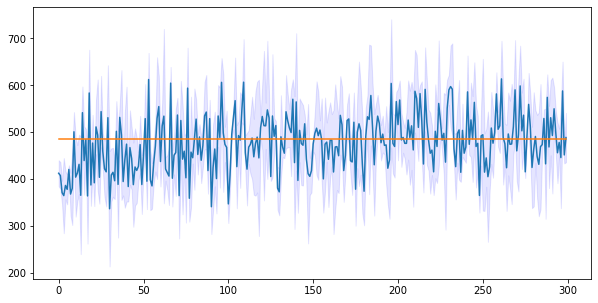

In [10]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

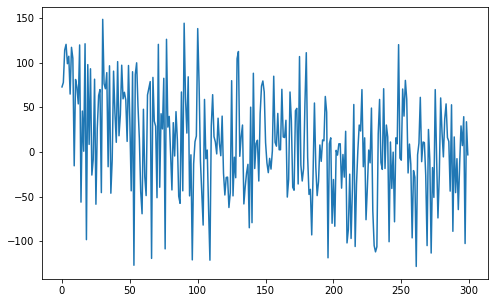

In [11]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

In [16]:
a = np.mean(regret[:,200:], axis=0)
np.shape(a)
print(np.mean(a))

-11.691336933333323


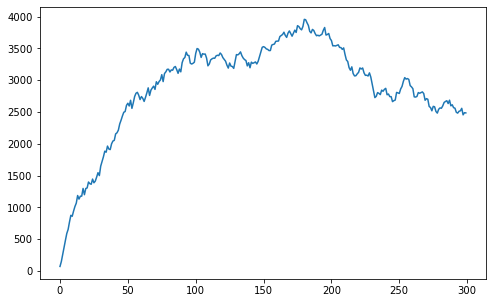

In [12]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()